In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Acquire
url = "https://gist.githubusercontent.com/zgulde/96991fedca29ff5371f5e7fa00d3fa95/raw/3e95d04e4ae544bf7b03b89dfde002ff502260a1/the_data.csv"
df = pd.read_csv(url)
df.head()

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C


In [3]:
# Prepare
# Set the timestamp as a datetime datatype and as the index
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index("timestamp", inplace=True)
df.head()

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C


## 1. By Group
- What is the maximum x value for group B?
- What is the average x value for group A?
- What is the minimum x value for group C?
- Which group has the highest sum of x values?


In [4]:
df.describe()

,x
count,48.000000
mean,0.026250
std,1.097024
min,-2.050000
25%,-0.842500
50%,0.190000
75%,0.687500
max,2.060000


In [5]:
# Describe the values when grouped by the "y" column
df.groupby("y").describe()

x                                                      
  count      mean       std   min     25%   50%     75%   max
y                                                            
A  18.0 -0.110556  0.925784 -1.30 -0.9075 -0.08  0.2575  1.84
B  13.0 -0.053846  1.328731 -2.05 -0.8100  0.20  0.7400  1.91
C  17.0  0.232353  1.108594 -1.83 -0.1300  0.28  0.9800  2.06

In [6]:
# What is the maximum x value for group B?
df.groupby("y").x.max()

y
A    1.84
B    1.91
C    2.06
Name: x, dtype: float64

In [7]:
print("The highest 'x' value among group B")
df.groupby("y").x.max().B

The highest 'x' value among group B


1.91

In [8]:
# What is the average x value for group A?
df.groupby("y").x.describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
A,18.0,-0.110556,0.925784,-1.30,-0.9075,-0.08,0.2575,1.84
B,13.0,-0.053846,1.328731,-2.05,-0.8100,0.20,0.7400,1.91
C,17.0,0.232353,1.108594,-1.83,-0.1300,0.28,0.9800,2.06


In [9]:
print("The average x value for group A is:")
df.groupby("y").x.mean().A

The average x value for group A is:


-0.11055555555555556

In [10]:
# What is the minimum x value for group C?
df.groupby("y").x.describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
A,18.0,-0.110556,0.925784,-1.30,-0.9075,-0.08,0.2575,1.84
B,13.0,-0.053846,1.328731,-2.05,-0.8100,0.20,0.7400,1.91
C,17.0,0.232353,1.108594,-1.83,-0.1300,0.28,0.9800,2.06


In [11]:
print("What is the minimum x value for group C?")
df.groupby("y").x.min().C

What is the minimum x value for group C?


-1.83

In [12]:
# Which group has the highest sum of x values?
df.groupby("y").x.sum()

y
A   -1.99
B   -0.70
C    3.95
Name: x, dtype: float64

In [13]:
print("Which group has the highest sum of x values?")
df.groupby("y").x.sum().idxmax()

Which group has the highest sum of x values?


'C'

## Time Aggregates
- What is the sum of the x values for 2018-05-01?
- What is the average x value for each day? The median?
- Which day has the largest x value?
- Which day has the smallest x value for group C?


In [14]:
# What is the sum of the x values for 2018-05-01?
df.groupby(df.index.date).sum()

,x
2018-04-30,5.28
2018-05-01,-4.02


In [15]:
# shows us the aggregate sums of both days
df.groupby(df.index.date).x.sum()

# shows the sum of x for 2018-05-01
df.groupby(df.index.date).x.sum()[0]

5.280000000000001

In [16]:
# What is the average x value for each day? The median?
df.groupby(df.index.date).agg(["mean", "median"])

x       
              mean median
2018-04-30  0.2200  0.175
2018-05-01 -0.1675  0.220

In [17]:
# Which day has the largest x value?
# the following shows the max for each day
df.groupby(df.index.date).x.max()

2018-04-30    2.06
2018-05-01    1.91
Name: x, dtype: float64

In [18]:
# Programmatically, which day has the largest x value?
df.groupby(df.index.date).x.max().idxmax()

datetime.date(2018, 4, 30)

In [19]:
# Which day has the smallest x value for group C?
x = df.groupby(["y", df.index.date]).x.min()
x.C

2018-04-30   -1.07
2018-05-01   -1.83
Name: x, dtype: float64

In [20]:
print("Which day has the smallest x value for group C?")
x.C.idxmin()

Which day has the smallest x value for group C?


datetime.date(2018, 5, 1)

## Visualization
- Visualize the minimum x value of each group with a bar chart.
- Visualize x over time.
- Visualize x over time by y value.

In [21]:
# Visualize the minimum x value of each group with a bar chart.
df.groupby("y").min()

,x
y,
A,-1.30
B,-2.05
C,-1.83


In [44]:
# Programmatically identify the letters
labels = df.groupby("y").min().index
labels

Index(['A', 'B', 'C'], dtype='object', name='y')

In [42]:
values = df.groupby("y").min()
values

,x
y,
A,-1.30
B,-2.05
C,-1.83


In [43]:
y_values = list(values.x)
y_values

[-1.3, -2.05, -1.83]

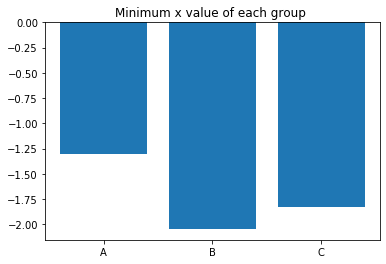

In [47]:
fig, ax = plt.subplots()
plt.bar(labels, y_values)
plt.title("Minimum x value of each group ")
plt.show()

In [64]:
# Create a non-index column to hold a copy of the timestamp data
df["date"] = df.index

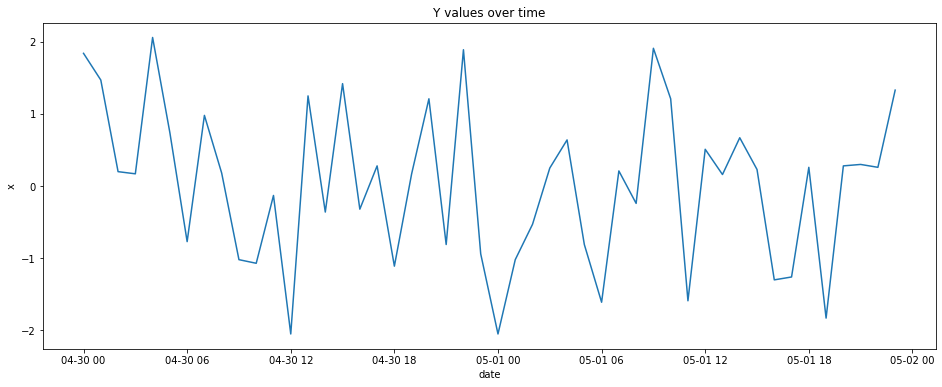

In [69]:
# Visualize x over time.
plt.figure(figsize=(16, 6))
plt.title("Y values over time")
sns.lineplot(x="date", y="x",
             data=df)

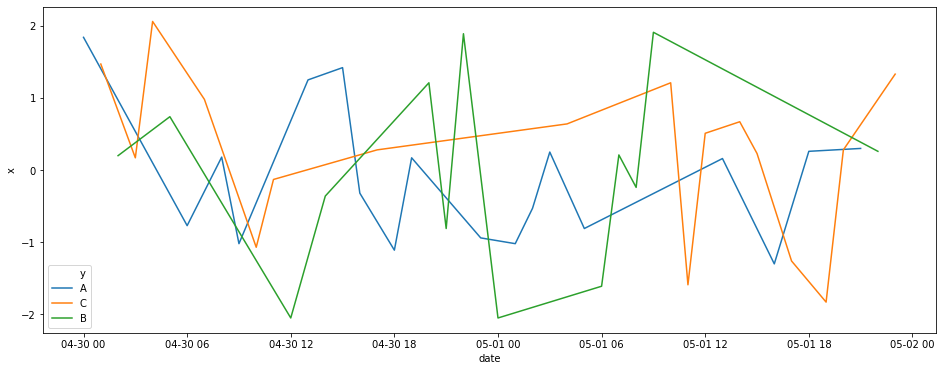

In [70]:
# Visualize x over time by y value.
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="x",
             hue="y",
             data=df)

# More Aggregation
- What is the least frequent y value for 2018-04-30?
- What is the most frequent y value for each day?

In [79]:
# What is the least frequent y value for 2018-04-30?
df.groupby(df.index.date).y.sum()

2018-04-30    ACBCCBACAACCBABAACAABBBA
2018-05-01    BAAACABBBBCCCACCACACCABC
Name: y, dtype: object

In [81]:
# Isolate the occurences for 2018-04-30
y_values = df.groupby(df.index.date).y.sum()[0]
y_values

'ACBCCBACAACCBABAACAABBBA'

In [120]:
from collections import Counter
occurrence_count = Counter(y_values) 
occurrence_count = pd.Series(occurrence_count)
occurrence_count

A    10
C     7
B     7
dtype: int64

In [129]:
# But how do we sort this out programmatically?
lowest_value = occurrence_count.min()
lowest_value

7

In [132]:
# Find any other occurrences that also have this lowest value
occurrence_count[occurrence_count == lowest_value]

C    7
B    7
dtype: int64

In [136]:
# What is the most frequent y value for each day?
highest_value = occurrence_count.max()

In [137]:
occurrence_count[occurrence_count == highest_value]

A    10
dtype: int64